# COVID-19 Data Analysis (EDA)
### Overview
This project analyzes global COVID-19 data from the WHO dataset, covering daily frequency reporting of new COVID-19 cases and deaths by date reported to WHO. 


### Objectives:
- Clean and preprocess the data.
- Identify trends and patterns in different countries.
- Compare COVID-19 cases across WHO regions.
- Perform a moving average analysis for Brazil, China, and Uganda.


In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [115]:
data = pd.read_csv("WHO-COVID-19-global-daily-data.csv")
data

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
447355,2025-02-09,TJ,Tajikistan,EUR,NaN,17786,NaN,125
447356,2025-02-09,SY,Syrian Arab Republic,EMR,NaN,57423,NaN,3163
447357,2025-02-09,LK,Sri Lanka,SEAR,NaN,672812,NaN,16907
447358,2025-02-09,SN,Senegal,AFR,NaN,89321,NaN,1972


In [116]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447360 entries, 0 to 447359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      447360 non-null  object 
 1   Country_code       445496 non-null  object 
 2   Country            447360 non-null  object 
 3   WHO_region         447360 non-null  object 
 4   New_cases          208549 non-null  float64
 5   Cumulative_cases   447360 non-null  int64  
 6   New_deaths         209492 non-null  float64
 7   Cumulative_deaths  447360 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 27.3+ MB
None


In [117]:
# Summary statistics
print(data.describe(include='all'))

       Date_reported Country_code   Country WHO_region     New_cases  \
count         447360       445496    447360     447360  2.085490e+05   
unique          1864          239       240          7           NaN   
top       2025-02-09           AI  Anguilla        EUR           NaN   
freq             240         1864      1864     115568           NaN   
mean             NaN          NaN       NaN        NaN  3.727591e+03   
std              NaN          NaN       NaN        NaN  4.877001e+04   
min              NaN          NaN       NaN        NaN -6.507900e+04   
25%              NaN          NaN       NaN        NaN  3.000000e+00   
50%              NaN          NaN       NaN        NaN  6.100000e+01   
75%              NaN          NaN       NaN        NaN  6.860000e+02   
max              NaN          NaN       NaN        NaN  6.966046e+06   

        Cumulative_cases     New_deaths  Cumulative_deaths  
count       4.473600e+05  209492.000000       4.473600e+05  
unique       

In [118]:
# Count missing values in each column
print(data.isnull().sum())

Date_reported             0
Country_code           1864
Country                   0
WHO_region                0
New_cases            238811
Cumulative_cases          0
New_deaths           237868
Cumulative_deaths         0
dtype: int64


In [119]:
# Drop rows where Country_code is missing
data = data.dropna(subset=["Country_code"])

In [120]:

# Fill missing values for New_cases and New_deaths with 0
data = data.copy()  # Ensure it's a copy before modification
data["New_cases"] = data["New_cases"].fillna(0)
data["New_deaths"] = data["New_deaths"].fillna(0)


### Handling Missing Values - Key Observations:
- The dataset originally had missing values in the, `country code`, `New_cases` and `New_deaths` columns.
- These missing values in `New_cases` and `New_deaths` were replaced with `0` to ensure proper analysis.
- Rows with missing `Country_code` were removed since they provide incomplete country-level information.


In [121]:
# Verify that missing values are handled
print(data.isnull().sum())

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


In [122]:
# Check for duplicates
print("Duplicate rows:", data.duplicated().sum())

# Drop duplicates if any
data.drop_duplicates(inplace=True)


Duplicate rows: 0


In [123]:
# Convert date column to datetime format
data["Date_reported"] = pd.to_datetime(data["Date_reported"])

# Convert numerical columns to appropriate types
data["New_cases"] = pd.to_numeric(data["New_cases"], errors='coerce')
data["New_deaths"] = pd.to_numeric(data["New_deaths"], errors='coerce')


#### removing outliers


to Make Outliers Handling More Flexible,
Instead of removing extreme values, let’s cap them using winsorization (keeps extreme values within a reasonable range).

In [124]:
from scipy.stats.mstats import winsorize

def winsorize_column(df, column, limits=(0.05, 0.05)):  # Caps top & bottom 5%
    df[column] = winsorize(df[column], limits=limits)
    return df

# Apply to your data
data = winsorize_column(data, "New_cases")
data = winsorize_column(data, "New_deaths")


###This ensures extreme values are kept but adjusted, avoiding data loss


 ### Exploratory Visualizations

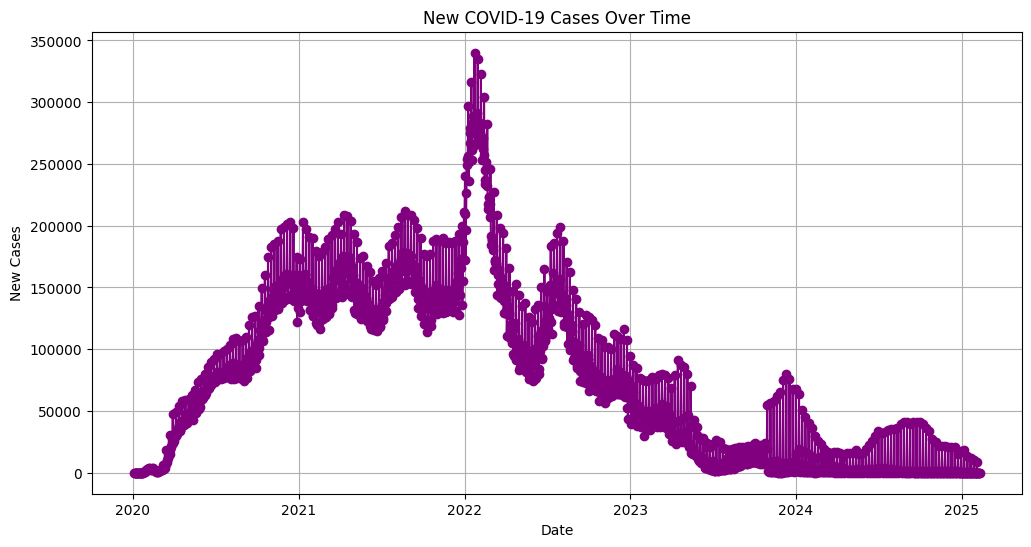

In [125]:
import matplotlib.pyplot as plt

# Group data by date and sum new cases
cases_over_time = data.groupby("Date_reported")["New_cases"].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(cases_over_time, color="purple", marker="o")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("New COVID-19 Cases Over Time")
plt.grid()
plt.show()


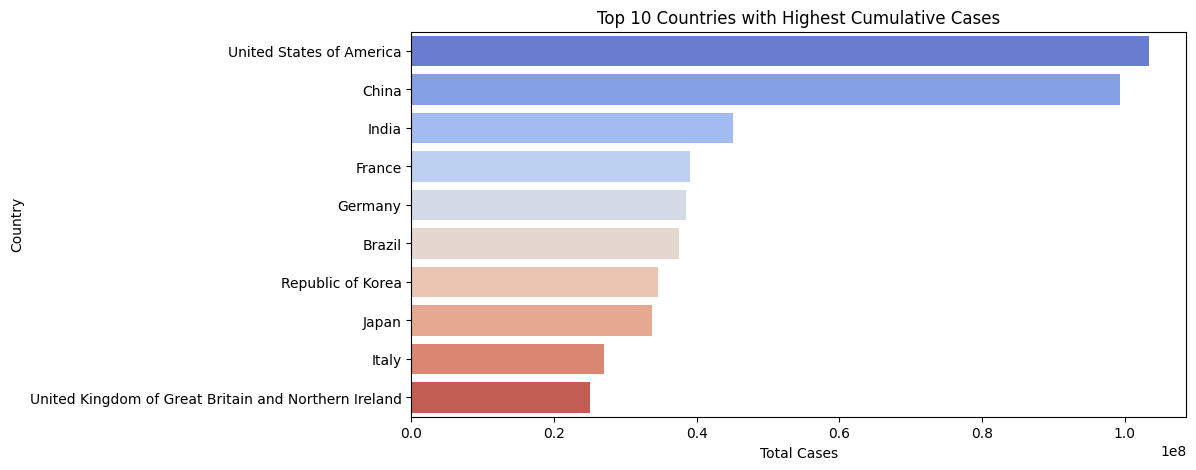

In [126]:
#using seaborn which i imported earlier
# Group by country and sum cases
top_countries = data.groupby("Country")["Cumulative_cases"].max().nlargest(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, 
            palette="coolwarm", legend=False)  # Adding hue to prevent warning
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.title("Top 10 Countries with Highest Cumulative Cases")
plt.show()


### Regional Comparison - Key Findings:
- The **United States of America** recorded the highest cumulative cases.
- The **United kingdom of great Britain and Northern ireland** had significantly fewer reported infections.
- Differences in case counts could be attributed to population size, government interventions, and testing capacity.


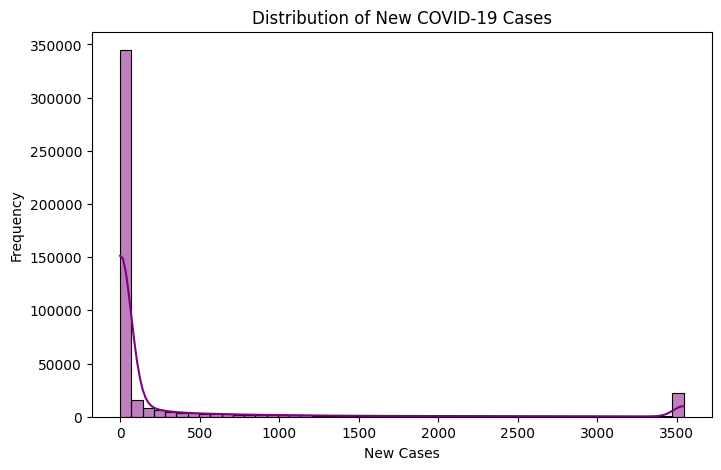

In [127]:
#distribution of new case
plt.figure(figsize=(8, 5))
sns.histplot(data["New_cases"].dropna(), bins=50, kde=True, color="purple")
plt.xlabel("New Cases")
plt.ylabel("Frequency")
plt.title("Distribution of New COVID-19 Cases")
plt.show()


Country-Specific Analysis

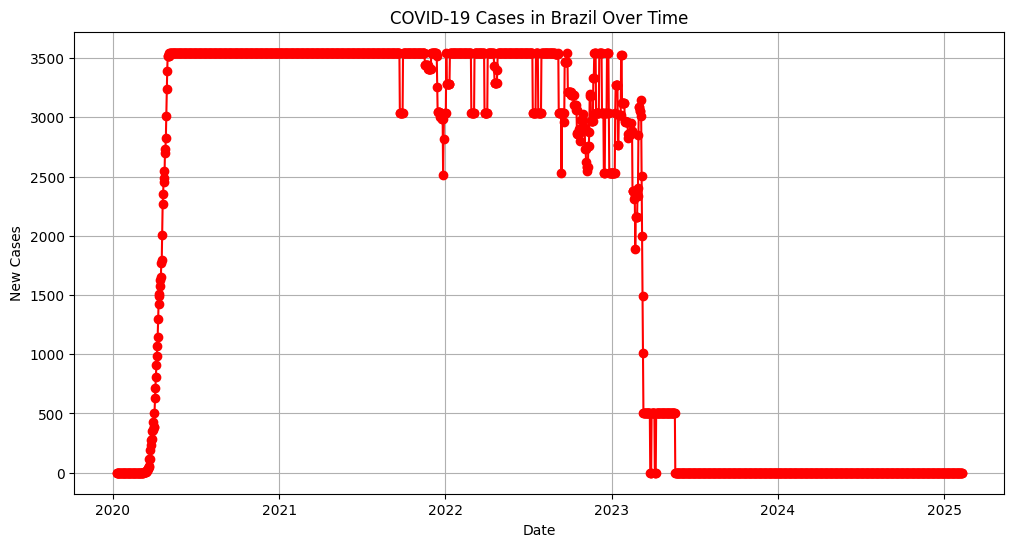

In [128]:
# Filter data for Brazil
# Ensure it's a copy before modification
brazil_data = data[data["Country"] == "Brazil"].copy()


# Plot new cases over time for Brazil
plt.figure(figsize=(12, 6))
brazil_data["Cases_MA7"] = brazil_data["New_cases"].rolling(window=7).mean()
 
plt.plot(brazil_data["Date_reported"], brazil_data["Cases_MA7"], color="red", marker="o")

plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("COVID-19 Cases in Brazil Over Time")
plt.grid()
plt.show()


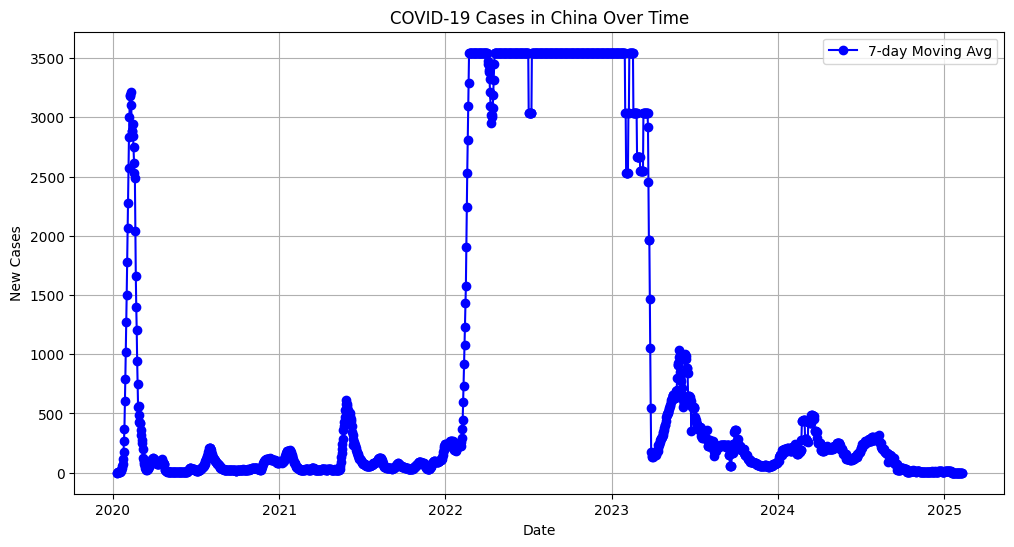

In [129]:
# Filter data for China
china_data = data[data["Country"] == "China"].copy()

# Calculate 7-day moving average
china_data["Cases_MA7"] = china_data["New_cases"].rolling(window=7).mean()

# Plot the moving average
plt.figure(figsize=(12, 6))
plt.plot(china_data["Date_reported"], china_data["Cases_MA7"], color="blue", marker="o", linestyle="-", label="7-day Moving Avg")

plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("COVID-19 Cases in China Over Time")
plt.legend()
plt.grid()
plt.show()



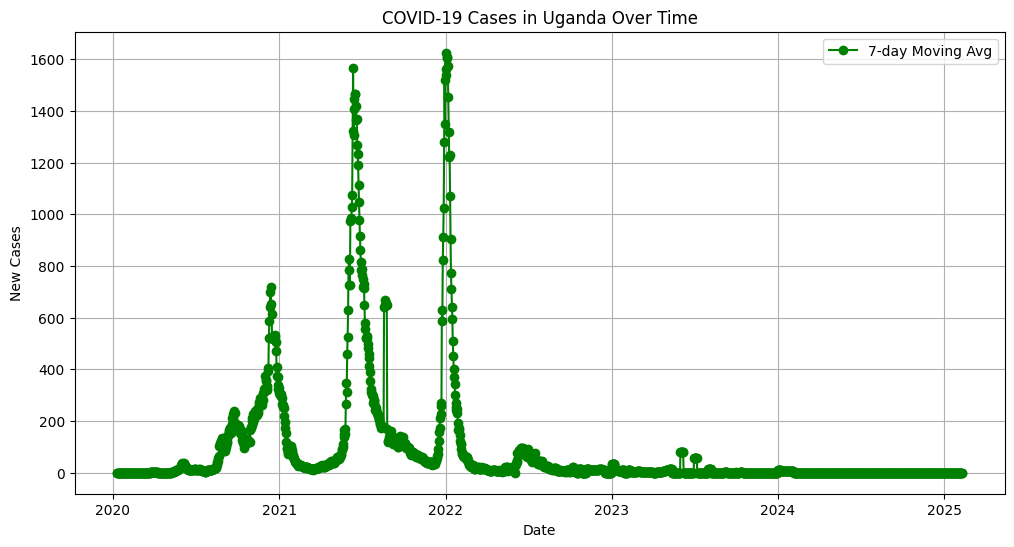

In [130]:
# Filter data for Uganda
uganda_data = data[data["Country"] == "Uganda"].copy()

# Calculate 7-day moving average
uganda_data["Cases_MA7"] = uganda_data["New_cases"].rolling(window=7).mean()

# Plot the moving average
plt.figure(figsize=(12, 6))
plt.plot(uganda_data["Date_reported"], uganda_data["Cases_MA7"], color="green", marker="o", linestyle="-", label="7-day Moving Avg")

plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("COVID-19 Cases in Uganda Over Time")
plt.legend()
plt.grid()
plt.show()



### Country-wise Analysis
#### 🇧🇷 Brazil
- Brazil experienced multiple waves of COVID-19, with major peaks in **2020-2022**.
- The 7-day moving average smooths out daily fluctuations, highlighting long-term trends.

#### 🇨🇳 China
- China had an early spike in cases in **2022-2023**, followed by stable trends.
- The trend suggests strong containment measures after initial outbreaks.

#### 🇺🇬 Uganda
- Uganda's cases showed **steady growth/spikes** in **2021-2022**.
- Possible explanations include changes in lockdown measures or testing capacity.


 ### Correlation Analysis

            New_cases  New_deaths
New_cases    1.000000    0.828358
New_deaths   0.828358    1.000000


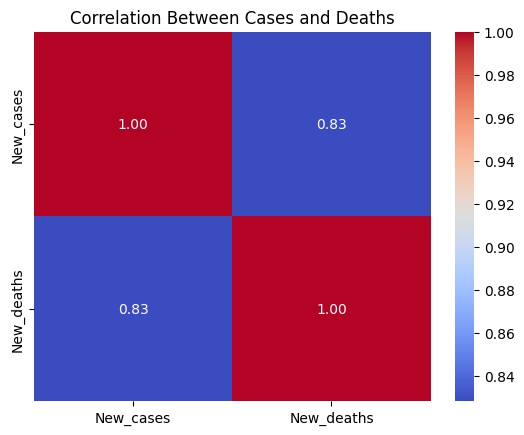

In [131]:

# Compute correlation
correlation = data[["New_cases", "New_deaths"]].corr()
print(correlation)

# Heatmap for better visualization
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Cases and Deaths")
plt.show()


 #### Save Cleaned Data for Further Use

In [ ]:
data.to_csv("cleaned_covid_data.csv", index=False)



# Conclusions
### Key Takeaways:
- COVID-19 cases varied across regions and countries, with distinct patterns.
- The **7-day moving average** helped in smoothing out short-term fluctuations in daily cases.
- Some regions had **multiple waves of infections**, while others showed **steady declines**.

